**Carbon accumulation in aboveground and belowground biomass and soil of different age native forest plantations in the humid tropical lowlands of Costa Rica**

https://www.researchgate.net/publication/226215183_Carbon_accumulation_in_aboveground_and_belowground_biomass_and_soil_of_different_age_native_forest_plantations_in_the_humid_tropical_lowlands_of_Costa_Rica

In [1]:
!pip install pymupdf tabula-py PyPDF2 jpype1

In [2]:
import fitz
import tabula
import os
import glob
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import Image, display

In [22]:
# function fit
from scipy.optimize import curve_fit

# disable warnings
import warnings
warnings.filterwarnings('ignore')

# save output
import os
import csv

In [ ]:
pdf_path = '/content/Carbon_accumulation_in_aboveground_and_belowground.pdf'

In [ ]:
doc = fitz.open(pdf_path)

# Extract text from each page
all_text = ""
for page_num in range(len(doc)):
    page = doc.load_page(page_num)
    all_text += page.get_text()

In [ ]:
with open('/content/Carbon_accumulation_AGB_BGB.txt', 'w') as txt_file:
    txt_file.write(all_text)

In [ ]:
# top_n_words - number of top frequent words to consider when scoring sentences
# distance - determine how sentence scores are calculated based on the distance between words
# number_of_sentences - to include in the summary if the percentage parameter is not used

original_sentences, best_sentences, sentences_score = summarize(original_text, 5, 2, 10)

In [ ]:
best_sentences

['Published allometric models for individual tropical trees (Pe ´rez and Kanninen 2002; Montero and Montagnini 2006; Na ´var 2009), rarely include the amount of carbon corre- sponding to coarse roots or the amount of biomass and carbon per hectare from other biomass compartments.',
 '2004; Sarmiento et al.',
 'However, studies have also shown that the use of carbon fractions in the range of 0.45 and 0.50 might account for as much as a 10% difference when applied to the same site and the same set of data (Elias and Potvin2003).Based on our biomassdata and comparingboth theobtainedcarbon fraction and the lower end value from the accepted range (0.45), we determined underestimations in total tree biomass between 4 and 6% depending on specie due to the use of 0.45.',
 'V. guatemalensis has a fast growth rate and a short rotation period close to 15 years (Petit and Montagnini 2004; Solı ´s and Moya 2004b), while H. alchorneoides has a lower growth rate and rotation periods between 25 and 40

In [14]:
pdf_path = '/content/rotated_page_10.pdf'
doc = fitz.open(pdf_path)

# extract tables
tables = tabula.read_pdf(pdf_path, pages='all', multiple_tables=True)

# convert into pandas df
dfs = [pd.DataFrame(table) for table in tables]

In [15]:
table_1 = dfs[0]

In [16]:
# change existing column headers into row 1
table_1.loc[-1] = table_1.columns
table_1.index = table_1.index + 1
table_1 = table_1.sort_index()

# update column headers
column_headers = ["Pool", "Components", 0, 0.7, 3.2, 5, 7, 9, 12, 14, 16] # age
table_1.columns = column_headers

In [17]:
table_1.replace([np.nan, 'Unnamed: 0'], ' ', inplace=True)

In [18]:
table_1

,Pool,Components,0,0.7,3.2,5,7,9,12,14,16
0,Tree B,Leaves,,0.3 ± 0.3,5.6 ± 3.2,1.7 ± 1.7,3.6 ± 0.7,3.8 ± 1.7,2.9 ± 0.8,3.7 ± 1.4,3.0 ± 0.5
1,,Branches,,0.1 ± 0.1,10.6 ± 8.4,2.3 ± 1.8,12.0 ± 10.1,23.7 ± 13.3,25.9 ± 7.3,13.8 ± 8.0,19.6 ± 4.7
2,,Stems,,0.5 ± 0.6,18.0 ± 13.3,7.2 ± 5.4,32.7 ± 13.0,55.8 ± 33.2,66.5 ± 12.6,68.5 ± 28.8,115.3 ± 22.8
3,,Roots,,0.2 ± 0.3,10.6 ± 7.6,3.8 ± 4.2,13.0 ± 8.7,27.7 ± 11.7,29.9 ± 5.3,29.3 ± 9.1,9.6 ± 19.1
4,,Total tree,,1.2 ± 1.3,44.7 ± 32.3,14.9 ± 12.7,61.3 ± 28.6,111.1 ± 51.5,125.1 ± 13.9,115.3 ± 40.7,146.5 ± 23.5
5,Tree C,Leaves,,0.1 ± 0.1,2.6 ± 1.4,0.7 ± 0.7,1.8 ± 0.3,1.7 ± 0.8,1.3 ± 0.3,1.7 ± 0.7,1.4 ± 0.2
6,,Branches,,0.1 ± 0.1,5.1 ± 4.0,1.2 ± 0.9,5.7 ± 4.8,11.8 ± 6.8,12.5 ± 3.5,5.9 ± 4.3,8.7 ± 1.8
7,,Stems,,0.3 ± 0.3,8.9 ± 6.6,3.7 ± 2.5,14.5 ± 6.2,28.0 ± 16.7,33.1 ± 6.2,34.1 ± 14.3,53.4 ± 8.8
8,,Roots,,0.1 ± 0.2,5.2 ± 3.8,1.7 ± 1.7,7.0 ± 4.3,13.3 ± 5.6,14.6 ± 2.6,14.3 ± 4.5,4.7 ± 9.4
9,,Total tree,,0.6 ± 0.6,21.8 ± 15.7,7.4 ± 5.6,29.0 ± 14.7,54.8 ± 25.7,61.6 ± 6.9,56.1 ± 19.1,68.3 ± 11.0


In [19]:
def clean_cell(cell):
    if ' ± ' in cell:
        return cell.split(' ± ')[0]
    return cell

In [20]:
table_1_mod = table_1.applymap(clean_cell)

In [21]:
table_1_mod # Biomass and carbon accumulation (Mg ha-1) in Hieronyma alchorneoides single species forestry plantations

,Pool,Components,0,0.7,3.2,5,7,9,12,14,16
0,Tree B,Leaves,,0.3,5.6,1.7,3.6,3.8,2.9,3.7,3.0
1,,Branches,,0.1,10.6,2.3,12.0,23.7,25.9,13.8,19.6
2,,Stems,,0.5,18.0,7.2,32.7,55.8,66.5,68.5,115.3
3,,Roots,,0.2,10.6,3.8,13.0,27.7,29.9,29.3,9.6
4,,Total tree,,1.2,44.7,14.9,61.3,111.1,125.1,115.3,146.5
5,Tree C,Leaves,,0.1,2.6,0.7,1.8,1.7,1.3,1.7,1.4
6,,Branches,,0.1,5.1,1.2,5.7,11.8,12.5,5.9,8.7
7,,Stems,,0.3,8.9,3.7,14.5,28.0,33.1,34.1,53.4
8,,Roots,,0.1,5.2,1.7,7.0,13.3,14.6,14.3,4.7
9,,Total tree,,0.6,21.8,7.4,29.0,54.8,61.6,56.1,68.3


In [23]:
def growth_curve(age, A, k, p):
    return A * (1 - np.exp(-k * age))**p

In [24]:
class TreeSpecies:
    def __init__(self, name, age, biomass, initial_guesses):
        self.name = name
        self.age = np.array(age)
        self.biomass = np.array(biomass)
        self.initial_guesses = initial_guesses
        self.params, _ = curve_fit(growth_curve, self.age, self.biomass, self.initial_guesses)
        self.plot()

    def plot(self):
        plt.scatter(self.age, self.biomass, label='data', marker='x', c='r')
        x = np.linspace(1, 50, 50)
        plt.plot(x, growth_curve(x, *self.params), 'b-', label='growth curve')

        plt.title(f'{self.name.upper()} GROWTH CURVE')
        plt.xlabel('Age (years)')
        plt.ylabel('AGB (Mg ha-1)')
        plt.legend()
        plt.xlim(1, 50)
        plt.show()
        print(f'Parameters: {self.params}')

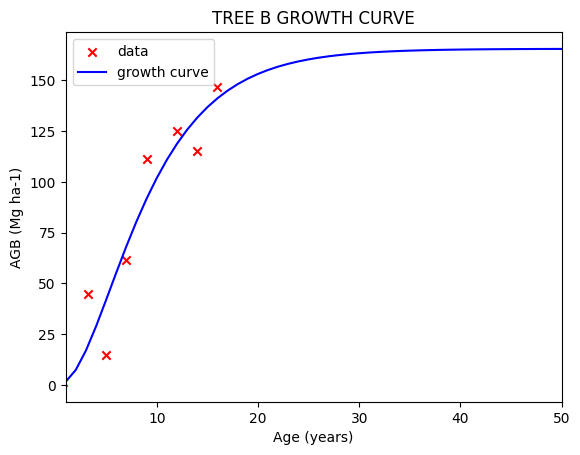

Parameters: [165.55276889   0.17537296   2.55327912]


In [25]:
nanciton_B = TreeSpecies('Tree B',
                         [0, 0.7, 3.2, 5, 7, 9, 12, 14, 16],
                         [0, 1.2,	44.7,	14.9,	61.3,	111.1,	125.1,	115.3,	146.5],
                         [165.584715376166, 0.175275822141196, 2.55179434198256])

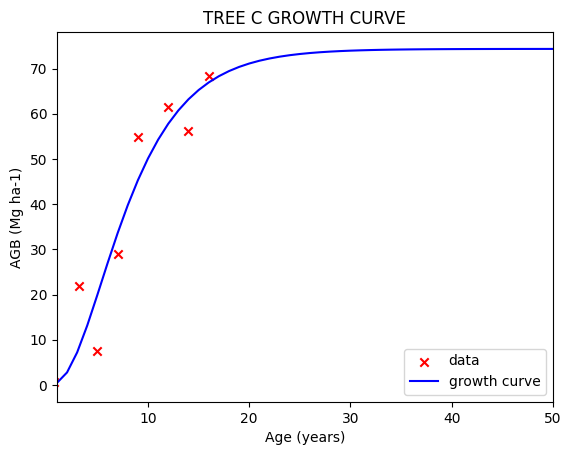

Parameters: [74.35996536  0.21268594  3.10758383]


In [27]:
nanciton_C = TreeSpecies('Tree C',
                         [0, 0.7, 3.2, 5, 7, 9, 12, 14, 16],
                         [0, 0.6,	21.8,	7.4,	29.0,	54.8,	61.6,	56.1,	68.3],
                         [74.3604349869385, 0.212679660590409, 3.10745565505567])